# Exploratory Data Analysis and cleaning for training data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
% matplotlib inline
np.random.seed(42)

In [65]:
train_df = pd.read_csv('../data/train.csv', index_col='Id')
train_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [66]:
train_df.shape

(2051, 80)

In [67]:
train_df.rename(mapper=lambda x: x.lower().replace(' ', '_'), axis =1, inplace=True)

## Looking at the data types

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         2051 non-null object
roof_matl          2

#### We have 39 numeric columns and 42 categorical columns
Examining the data dictionary suggests that `ms_subclass` is categorical

In [69]:
train_df.ms_subclass = train_df.ms_subclass.astype('object')

## Plotting 

In [70]:
import math
# @params df = data frame
# @params colums = list of column headers
# @params target = string that is our target column
# @params num_cols = 2, number of subplots per row
def make_a_plots(df, columns, target, num_cols = 2):
    fig = plt.figure(figsize=(6*num_cols,4*round(len(columns)/num_cols)))
    for i, col in enumerate(columns):
        fig.add_subplot(math.ceil(len(columns)/num_cols), num_cols, i+1)
        
        if(df[col].dtype != 'object'):
            plt.scatter(df[col], df[target])
            plt.xlabel(col)
            plt.ylabel(target)
        else:
            sns.boxplot(x=target, y = col, data=df)
    fig.tight_layout()

In [71]:
numerics = train_df.select_dtypes(exclude='object')

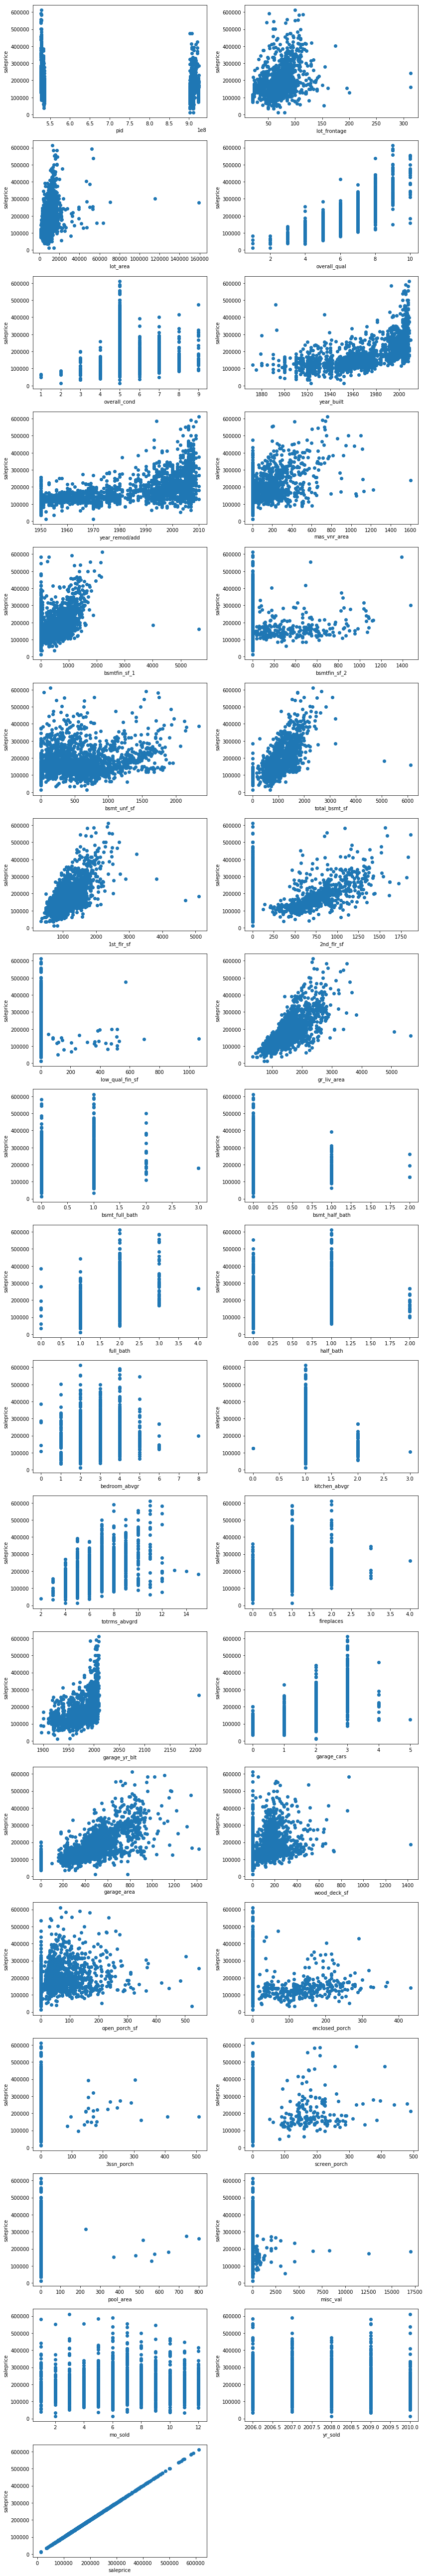

In [72]:
make_a_plots(numerics, numerics.columns, 'saleprice' )

#### We can see that there are several outliers, as well as some impossible values.  

___
# Cleaning


### What to do with null values
 * Drop `mas_vnr_.*`
 * Drop `garage_yr_built`
 * use median for `lot_frontage`
 * use mode for `electrical`
 * All other floats use 0 for na
 * All other objects use 'NA'
 


#### I am using a function that lists every feature with null values present as well as how many there are.

In [73]:
def series_of_null_features(df):
    return df.loc[:,df.isnull().sum() > 0].isnull().sum()

In [74]:
series_of_null_features(train_df)

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [75]:
train_df.total_bsmt_sf.fillna(0, inplace=True)

train_df.bsmt_unf_sf.fillna(0, inplace=True)

train_df.bsmt_full_bath.fillna(0, inplace=True)

train_df.bsmt_half_bath.fillna(0, inplace=True)

train_df.bsmt_qual.fillna('NA', inplace=True)

train_df.bsmt_cond.fillna('NA', inplace=True)

train_df.bsmt_exposure.fillna('NA', inplace=True)

train_df.bsmtfin_sf_1.fillna(0, inplace=True)

train_df.bsmtfin_type_1.fillna('NA', inplace = True)

train_df.bsmtfin_sf_2.fillna(0, inplace=True)

train_df.bsmtfin_type_2.fillna('NA', inplace=True)

In [86]:
train_df[train_df.garage_finish.isnull() & ~train_df.garage_type.isnull()].loc[:, ['garage_cars','garage_area','garage_type', 'garage_finish', 'garage_qual', 'garage_cond']]

,garage_cars,garage_area,garage_type,garage_finish,garage_qual,garage_cond
Id,,,,,,
2237,NaN,NaN,Detchd,NaN,NaN,NaN


I think I'm going to impute NaN for garage_type and then do the transformations on it
___

In [87]:
train_df.loc[train_df.garage_finish.isnull() & ~train_df.garage_type.isnull(), 'garage_type'] = 'NA'

train_df.garage_area.fillna(0, inplace=True)

train_df.garage_cars.fillna(0, inplace=True)

train_df.garage_cond.fillna('NA', inplace=True)

train_df.garage_finish.fillna('NA', inplace=True)

train_df.garage_qual.fillna('NA', inplace=True)

train_df.garage_type.fillna('NA', inplace=True)

train_df.alley.fillna('NA', inplace=True)

train_df.lot_frontage.fillna(value=train_df.lot_frontage.median(), inplace=True)

train_df.drop(['mas_vnr_type', 'mas_vnr_area', 'garage_yr_blt'], axis = 1, inplace = True)

train_df.fireplace_qu.fillna('NA', inplace=True)

train_df.pool_qc.fillna('NA', inplace=True)

train_df.fence.fillna('NA', inplace=True)

train_df.misc_feature.fillna('NA', inplace=True)

In [102]:
series_of_null_features(train_df)

Series([], dtype: float64)

#### Dropping `pid` because it has no correlation with the housing price, as it is just an alternate id

In [114]:
train_df.drop('pid', 1,inplace=True)

# Exporting clean data

In [43]:
train_df.to_csv('../data/train_CLEAN.csv')
train_df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,3,2010,WD,138500


# So now there should be no null values

## Feature selection
 * Make dummy variables 
   * Remember that MSSubClass will have a value in the train data that wont be in the test data.  Making a dummy variable for this will give a different shape to our train data than to our test data
 * Use LassoCV to determine which coefs should be dropped (see kobe lab) 
 * drop those features manually before making the final model
 * We may want to use `np.log1p()` to remove the skew from the target columns. Don't forget to undo this before turning it in though with `np.expm1()`

### Lets look at the sq_ft vs price

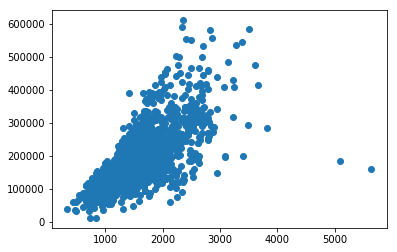

In [50]:
plt.scatter(x=train_df.gr_liv_area, y = train_df.saleprice)

### You can see we have a couple of outliers.

I'm deciding to drop these as they won't contribute to training the model

In [132]:
ind = train_df.loc[train_df.gr_liv_area > 4500].index

In [133]:
ind

Int64Index([], dtype='int64', name='id')

In [134]:
train_df.drop(labels =ind, axis=0, inplace=True)

In [135]:
cols_need_dummies =  train_df.select_dtypes(include='object').columns
train_df_dummied = pd.get_dummies(data=train_df, columns=cols_need_dummies)


(2049, 311)

In [138]:
train_df_dummied.shape

(2049, 311)

# Now Export the engineered data to use in the model making notebook

In [141]:
train_df_dummied.to_csv('../data/train_ENGINEERED.csv')
train_df_dummied.head()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,...,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
id,,,,,,,,,,,,,,,,,,,,,
109,68.0,13517,6,8,1976,2005,533.0,0.0,192.0,725.0,...,0,0,0,0,0,0,0,0,0,1
544,43.0,11492,7,5,1996,1997,637.0,0.0,276.0,913.0,...,0,0,0,0,0,0,0,0,0,1
153,68.0,7922,5,7,1953,2007,731.0,0.0,326.0,1057.0,...,0,0,0,0,0,0,0,0,0,1
318,73.0,9802,5,5,2006,2007,0.0,0.0,384.0,384.0,...,0,0,0,0,0,0,0,0,0,1
255,82.0,14235,6,8,1900,1993,0.0,0.0,676.0,676.0,...,0,0,0,0,0,0,0,0,0,1


## Now go make a model